In [9]:
from salad.serialize import read, write
from salad.analysis.plot import plot_cluster, plot_result, plot_fake, plot_catalog
import astropy.table
import os
import matplotlib.pyplot as plt

In [2]:
def load_recovery(pg, detector, snr):
    search_path = f"../search/tmp/DEEP/{pg}/detector_{detector}/snr_{snr}"
    
    catalog = read(os.path.join(search_path, "catalog.pkl"))
    recovery = read(os.path.join(search_path, "recovery.pkl"))
    catalog_findable = read(os.path.join(search_path, "catalog_detectable.pkl"))
    search_findable = read(os.path.join(search_path, "search_detectable.pkl"))
    detector_fakes = read(os.path.join(search_path, "..", "fakes.pkl"))
    clusters = read(os.path.join(search_path, "gather_2.pkl"))
    
    return catalog, detector_fakes, recovery, catalog_findable, search_findable, clusters

In [5]:
def completeness(pointing_group, snr):
    c = []
    for detector in [i for i in range(1, 63)]:
        try:
            detector_catalog, detector_fakes, recovery, catalog_findable, search_findable, clusters = load_recovery(
                pointing_group, detector, snr
            )
        except (FileNotFoundError, EOFError) as e:
            print(e)
            continue
            
        did_find = {
            orbit: any([v/catalog_findable[orbit] > 0.6 for k, v in recovery[orbit].items()]) for orbit in recovery
        }
        for orbit in did_find:
            c.append(
                dict(
                    orbit=orbit,
                    detector=detector,
                    mag=detector_fakes[detector_fakes['ORBITID'] == orbit][0]['MAG'],
                    found=did_find[orbit],
                    catalog_possible=catalog_findable[orbit] > 25,
                    search_possible=search_findable[orbit]['findable'],
                    n_detection=catalog_findable[orbit],
                )
            )

    c = astropy.table.Table(c)
    return c


In [6]:
d = []

for snr in [5, 4, 3]:
    c = completeness("20190403/A0c", snr)
    c['snr'] = snr
    d.append(c)
    
pg_c = astropy.table.vstack(d)

Ran out of input
[Errno 2] No such file or directory: '../search/tmp/DEEP/20190403/A0c/detector_21/snr_5/recovery.pkl'
Ran out of input
[Errno 2] No such file or directory: '../search/tmp/DEEP/20190403/A0c/detector_30/snr_5/recovery.pkl'
Ran out of input
Ran out of input
Ran out of input
Ran out of input
[Errno 2] No such file or directory: '../search/tmp/DEEP/20190403/A0c/detector_21/snr_4/recovery.pkl'
Ran out of input
Ran out of input
[Errno 2] No such file or directory: '../search/tmp/DEEP/20190403/A0c/detector_51/snr_4/recovery.pkl'
Ran out of input
Ran out of input
Ran out of input
[Errno 2] No such file or directory: '../search/tmp/DEEP/20190403/A0c/detector_5/snr_3/recovery.pkl'
[Errno 2] No such file or directory: '../search/tmp/DEEP/20190403/A0c/detector_6/snr_3/recovery.pkl'
[Errno 2] No such file or directory: '../search/tmp/DEEP/20190403/A0c/detector_10/snr_3/recovery.pkl'
[Errno 2] No such file or directory: '../search/tmp/DEEP/20190403/A0c/detector_13/snr_3/recovery.pkl'

In [13]:
load_recovery("20190403/A0c", 1, 3)[0].num_times

104

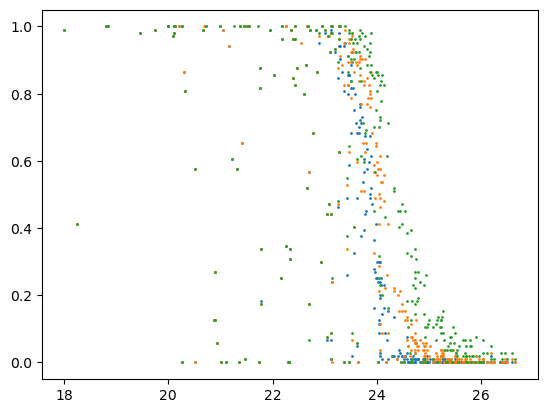

In [15]:
for snr in [5, 4, 3]:
    c = pg_c[pg_c['snr'] == snr]
    plt.scatter(c['mag'], c['n_detection']/104, s=1)
    
plt.show()